# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import sqlite3
import pandas as pd
from sqlalchemy import *
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import GridSearchCV

from statistics import mean

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pickle
import time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
# load data from database
engine = create_engine('sqlite:///InsertDatabaseName.db')

#engine.table_names()
df = pd.read_sql_table('InsertTableName', engine)  
df.head()
X = df.message 
Y = df.iloc[:, 4:]

In [8]:
list(df.columns)

['id',
 'message',
 'original',
 'genre',
 'related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

### 2. Write a tokenization function to process your text data

In [3]:
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    ## lemmatize andremove stop words
    #tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # initiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    
    # iterate through each token
    clean_tokens = []
    for tok in tokens:
        
        
        # lemmatize, normalize case, and remove leading/trailing white space
        clean_tok =  lemmatizer.lemmatize( (tok.strip()).lower())
        
        
        clean_tokens.append(clean_tok)
    
    return clean_tokens

In [4]:
tokenize('Hi there! What cAN i do for you_today')

['hi', 'there', 'what', 'can', 'i', 'do', 'for', 'you', 'today']

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [5]:
pipeline =  Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(RandomForestClassifier(), n_jobs = -1))
        #('clf', MultiOutputRegressor(GradientBoostingRegressor(random_state=0),n_jobs = -1))
    ])



### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [14]:
start=time.time()


X_train, X_test, y_train, y_test = train_test_split(X, Y)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('training time taken: ',round(time.time()-start,0),'seconds')



training time taken:  83.0 seconds


### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [15]:
accuracy=[]
for a,b in zip(y_test, y_pred.T):  
    print("Column Name: "+a)
    print("f1 score: {}".format(f1_score(y_test[a], b, average = None)))
    print("Precision score: {}".format(precision_score(y_test[a], b, average = None)))
    print("Recall score: {}".format(recall_score(y_test[a], b, average = None)))
    print()
    accuracy.append((y_test[a] == b).mean())


Column Name: related
f1 score: [ 0.47286496  0.87975218  0.46153846]
Precision score: [ 0.64302059  0.82908705  0.64285714]
Recall score: [ 0.37391883  0.9370126   0.36      ]

Column Name: request
f1 score: [ 0.93235704  0.52567237]
Precision score: [ 0.88411308  0.85148515]
Recall score: [ 0.98617002  0.38019452]

Column Name: offer
f1 score: [ 0.9974761  0.       ]
Precision score: [ 0.99496491  0.        ]
Recall score: [ 1.  0.]

Column Name: aid_related
f1 score: [ 0.79196692  0.62071936]
Precision score: [ 0.71885053  0.76203067]
Recall score: [ 0.88164124  0.52361919]

Column Name: medical_help
f1 score: [ 0.95961047  0.12758621]
Precision score: [ 0.92662248  0.55223881]
Recall score: [ 0.99503393  0.07212476]

Column Name: medical_products
f1 score: [ 0.97434288  0.09917355]
Precision score: [ 0.95230061  0.52941176]
Recall score: [ 0.99742972  0.05471125]

Column Name: search_and_rescue
f1 score: [ 0.98723799  0.07821229]
Precision score: [ 0.97554265  0.58333333]
Recall sco

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Precision score: [ 0.93231441  0.86619718]
Recall score: [ 0.99683175  0.22082585]

Column Name: storm
f1 score: [ 0.96125689  0.50473186]
Precision score: [ 0.93622817  0.76677316]
Recall score: [ 0.98766058  0.37617555]

Column Name: fire
f1 score: [ 0.99478448  0.02857143]
Precision score: [ 0.98962307  1.        ]
Recall score: [ 1.          0.01449275]

Column Name: earthquake
f1 score: [ 0.98121638  0.77810362]
Precision score: [ 0.97133028  0.88444444]
Recall score: [ 0.9913058   0.69458988]

Column Name: cold
f1 score: [ 0.99175718  0.15748031]
Precision score: [ 0.98455185  0.625     ]
Recall score: [ 0.99906876  0.09009009]

Column Name: other_weather
f1 score: [ 0.97126211  0.1031941 ]
Precision score: [ 0.94644775  0.56756757]
Recall score: [ 0.99741268  0.05675676]

Column Name: direct_report
f1 score: [ 0.91494253  0.46496107]
Precision score: [ 0.85733223  0.80539499]
Recall score: [ 0.98085308  0.32681783]



In [16]:
print('Mean accuracy')
mean(accuracy)

Mean accuracy


0.9424143016987081

### 6. Improve your model
Use grid search to find better parameters. 

In [18]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x7fccb814b620>, vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
               oob_score=False, random_state=None,

In [24]:
parameters = {
#        'vect__ngram_range': ((1, 1), (1, 2)),
#        'vect__max_df': (0.5, 0.75, 1.0),
#        'vect__max_features': (None, 5000, 10000),
#        'tfidf__use_idf': (True, False),
#        'clf__estimator__n_estimators': [50, 100, 200],
        'clf__estimator__min_samples_split': [2, 3]

    }

cv = GridSearchCV(pipeline,param_grid=parameters, n_jobs=-1, verbose=2)



### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [25]:
start=time.time()
cv.fit(X_train, y_train)
print('Grid search time taken: ',round(time.time()-start,0),'seconds')


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] clf__estimator__min_samples_split=2 .............................
[CV] .............. clf__estimator__min_samples_split=2, total=  44.0s
[CV] clf__estimator__min_samples_split=2 .............................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   52.7s remaining:    0.0s


[CV] .............. clf__estimator__min_samples_split=2, total=  44.2s
[CV] clf__estimator__min_samples_split=2 .............................
[CV] .............. clf__estimator__min_samples_split=2, total=  47.3s
[CV] clf__estimator__min_samples_split=3 .............................
[CV] .............. clf__estimator__min_samples_split=3, total=  41.3s
[CV] clf__estimator__min_samples_split=3 .............................
[CV] .............. clf__estimator__min_samples_split=3, total=  41.5s
[CV] clf__estimator__min_samples_split=3 .............................
[CV] .............. clf__estimator__min_samples_split=3, total=  40.8s


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.2min finished


Grid search time taken:  389.0 seconds


In [26]:
y_pred = cv.predict(X_test)

In [27]:
accuracy=[]
for a,b in zip(y_test, y_pred.T):  
    print("Column Name: "+a)
    print("f1 score: {}".format(f1_score(y_test[a], b, average = None)))
    print("Precision score: {}".format(precision_score(y_test[a], b, average = None)))
    print("Recall score: {}".format(recall_score(y_test[a], b, average = None)))
    print()
    accuracy.append((y_test[a] == b).mean())
    
    
print('Mean accuracy')
print(mean(accuracy))

Column Name: related
f1 score: [ 0.49195213  0.88138152  0.5       ]
Precision score: [ 0.64782609  0.83452466  0.57894737]
Recall score: [ 0.39654025  0.93381324  0.44      ]

Column Name: request
f1 score: [ 0.93183809  0.540732  ]
Precision score: [ 0.88766483  0.81349911]
Recall score: [ 0.98063802  0.40495137]

Column Name: offer
f1 score: [ 0.9974761  0.       ]
Precision score: [ 0.99496491  0.        ]
Recall score: [ 1.  0.]

Column Name: aid_related
f1 score: [ 0.7885741   0.60446781]
Precision score: [ 0.71054852  0.76074972]
Recall score: [ 0.88584955  0.50145349]

Column Name: medical_help
f1 score: [ 0.95966199  0.10283688]
Precision score: [ 0.92557281  0.56862745]
Recall score: [ 0.99635822  0.05653021]

Column Name: medical_products
f1 score: [ 0.97498235  0.10644258]
Precision score: [ 0.9524977   0.67857143]
Recall score: [ 0.99855422  0.05775076]

Column Name: search_and_rescue
f1 score: [ 0.98731828  0.06818182]
Precision score: [ 0.97540107  0.66666667]
Recall sco

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Precision score: [ 0.94005664  0.88888889]
Recall score: [ 0.9963315   0.31597846]

Column Name: storm
f1 score: [ 0.96277997  0.53112033]
Precision score: [ 0.9386641   0.78527607]
Recall score: [ 0.98816768  0.40125392]

Column Name: fire
f1 score: [ 0.99470656  0.05479452]
Precision score: [ 0.98977099  0.5       ]
Recall score: [ 0.9996916   0.02898551]

Column Name: earthquake
f1 score: [ 0.97108788  0.59027778]
Precision score: [ 0.94922561  0.87628866]
Recall score: [ 0.99398094  0.44502618]

Column Name: cold
f1 score: [ 0.99168207  0.12903226]
Precision score: [ 0.98425317  0.61538462]
Recall score: [ 0.99922396  0.07207207]

Column Name: other_weather
f1 score: [ 0.97135663  0.09      ]
Precision score: [ 0.94604537  0.6       ]
Recall score: [ 0.99805951  0.04864865]

Column Name: direct_report
f1 score: [ 0.91528724  0.47156267]
Precision score: [ 0.85851876  0.80263158]
Recall score: [ 0.98009479  0.33385457]

Mean accuracy
0.941477638762


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

In [11]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(cv, open(filename, 'wb'))

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [14]:
df.sum(axis=0)


id                                                                399133916
message                   Weather update - a cold front from Cuba that c...
genre                     directdirectdirectdirectdirectdirectdirectdire...
related                                                               20282
request                                                                4474
offer                                                                   118
aid_related                                                           10860
medical_help                                                           2084
medical_products                                                       1313
search_and_rescue                                                       724
security                                                                471
military                                                                860
child_alone                                                               0
water       

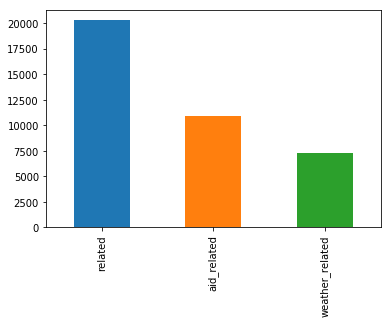

In [34]:
g1 = df.drop(df.columns[[0, 1]], axis=1, inplace=False).sum(axis = 0).sort_values(ascending =False)

g1.reset_index()

g1[:3].plot.bar()

In [70]:
message_cat_sum = df.drop(df.columns[[0, 1]], axis=1, inplace=False).sum(axis = 0).sort_values(ascending =False)[:10].reset_index()
message_cat_sum['index']

0            related
1        aid_related
2    weather_related
3      direct_report
4            request
5          other_aid
6               food
7         earthquake
8              storm
9            shelter
Name: index, dtype: object